In [1]:
# we're going to just play around and see what happens, mkay?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../parametric-cooling/data/control.csv")
data.head()

,t,x,v
0,0.000000,1.000000e-07,0.000000
1,0.000000,5.558650e-08,-0.068966
2,0.000001,-3.786050e-08,-0.076350
3,0.000002,-9.716170e-08,-0.015966
4,0.000003,-6.992950e-08,0.058205


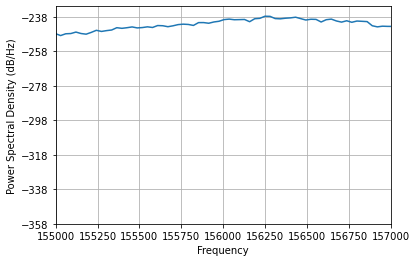

In [4]:
plt.psd(data.x, Fs=1e6, NFFT=2**15)
plt.xlim((155e3,157e3))
plt.show()

In [7]:
# so frequency appears to be 156.5 kHz, or something. which is interesting.

inPhaseSignal = np.cos(2*np.pi*170.5e3*data.t)
outPhaseSignal = np.sin(2*np.pi*170.5e3*data.t)


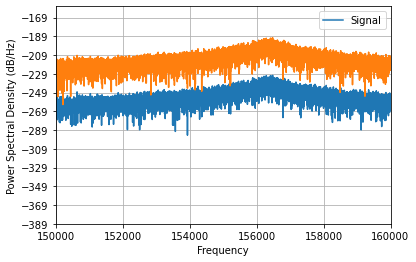

In [24]:
unpassedX = data.x*inPhaseSignal
unpassedY = data.x*outPhaseSignal

plt.psd(data.x, Fs=1e6, NFFT=2**20, label="Signal")
plt.psd(100*data.x + 100*np.random.uniform(high=1e-3*data.x.max(), size=data.t.shape), Fs=1e6, NFFT=2**20)
# plt.psd(unpassedX, Fs=1e6, NFFT=2**10, label="Unfiltered X")
# plt.psd(unpassedY, Fs=1e6, NFFT=2**10, label="Unfiltered Y")
plt.xlim((150e3, 160e3))

plt.legend()
plt.show()


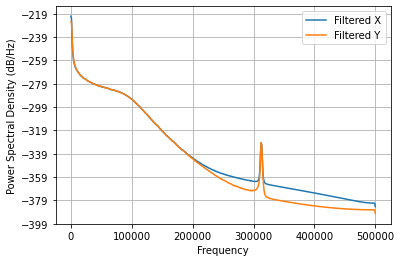

In [26]:
from scipy.signal import butter, filtfilt

b, a = butter(4, 100e3, 'low', fs=1e6)
filteredX = filtfilt(b, a, unpassedX)
filteredY = filtfilt(b, a, unpassedY)

# plt.psd(data.x, Fs=1e6, NFFT=2**10, label="Signal")
plt.psd(filteredX, Fs=1e6, NFFT=2**10, label="Filtered X")
plt.psd(filteredY, Fs=1e6, NFFT=2**10, label="Filtered Y")
plt.legend()
plt.show()

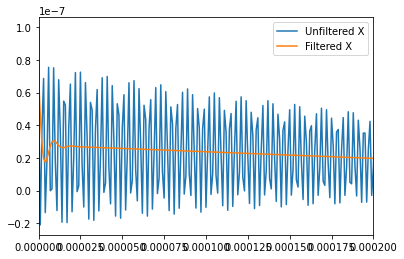

In [33]:
plt.plot(data.t, unpassedX, label="Unfiltered X")
plt.plot(data.t, filteredX, label="Filtered X")
plt.legend()
plt.xlim((0.0,0.0002))
plt.show()

In [34]:
demodR = np.sqrt(filteredX**2 + filteredY**2)

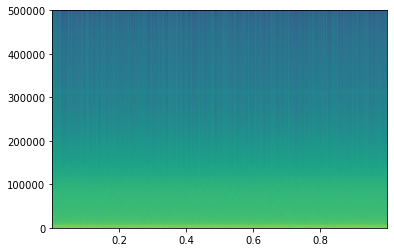

In [47]:
plt.specgram(demodR, Fs=1e6, NFFT=2**8)
plt.show()

In [49]:
phase_diff = -np.arctan2(filteredY, filteredX)

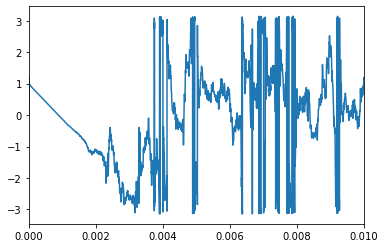

In [54]:
plt.plot(data.t, phase_diff)
plt.xlim((0.0,0.01))
plt.show()